$Gráfica \:del \:Potencial \:Magnético: \:Anillo \:con \:Corriente$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir las constantes
A = 1.0
R = 1.0

# Definir las funciones del potencial en coordenadas cartesianas
def P_in(x, z, y, R, A):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    return A * r * np.cos(theta)

def P_out(x, z, y, R, A):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    return A * R**3 * r**(-2) * np.cos(theta)

# Crear una malla de puntos en el plano zy
z = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
Z, Y = np.meshgrid(z, y)
X = np.zeros_like(Z)  # Mantener x constante

# Evaluar el potencial en la malla
r = np.sqrt(X**2 + Y**2 + Z**2)
P_in_values = P_in(X, Z, Y, R, A)
P_out_values = P_out(X, Z, Y, R, A)
P = np.where(r <= R, P_in_values, P_out_values)

# Graficar el potencial en el plano zy
plt.figure(figsize=(8, 6))
cp = plt.contourf(Y, Z, P, levels=50, cmap='twilight')
plt.colorbar(cp, label='Potencial P')
plt.title('Potencial P en el plano zy')
plt.xlabel('y')
plt.ylabel('z')
plt.axis('equal')
plt.show()

# Definir las constantes
A = 1.0
R = 1.0

# Definir las funciones del potencial en coordenadas cartesianas
def P_in(x, z, y, R, A):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    return A * r * np.cos(theta)

def P_out(x, z, y, R, A):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    return A * R**3 * r**(-2) * np.cos(theta)

# Crear una malla de puntos en el plano zy
z = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
Z, Y = np.meshgrid(z, y)
X = np.zeros_like(Z)  # Mantener x constante

# Evaluar el potencial en la malla
r = np.sqrt(X**2 + Y**2 + Z**2)
P_in_values = P_in(X, Z, Y, R, A)
P_out_values = P_out(X, Z, Y, R, A)
P = np.where(r <= R, P_in_values, P_out_values)

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar el potencial en el plano zy
surf = ax.plot_surface(Y, Z, P, cmap='twilight', edgecolor='none')

# Configurar la barra de color
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Potencial P')

# Configurar la gráfica
ax.set_title('Potencial P en el plano zy (3D)')
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_zlabel('Potencial P')
plt.show()

$Campo\: de\: Inducción\: Magnética\: 2D: \: Anillo\: con \: Corriente$

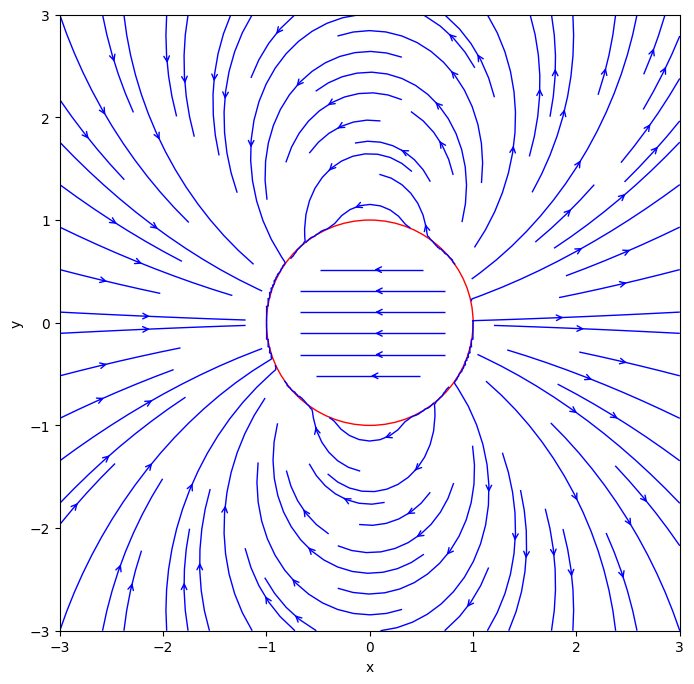

In [6]:
# Anillo con Corriente en 2D

import numpy as np
import matplotlib.pyplot as plt

#  Constantes
A = 1.0  
R = 1.0  # Radio del anillo con corriente

# Meshgrid de los puntos
x, y = np.meshgrid(np.linspace(-3, 3, 400), np.linspace(-3, 3, 400))

# Conversión a polares
r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

# Definimos los componentes del campo magnético dentro del anillo
B_r_in = - A * np.cos(theta)
B_theta_in = A * np.sin(theta)
B_x_in = B_r_in * np.cos(theta) - B_theta_in * np.sin(theta)
B_y_in = B_r_in * np.sin(theta) + B_theta_in * np.cos(theta)

#Definimos los componentes del campo magnético fuera del anillo
B_r_out = (2 * A * R**3 / r**3) * np.cos(theta)
B_theta_out = (A * R**3 / r**3) * np.sin(theta)
B_theta_out = (A * R**3 / r**3) * np.sin(theta)
B_x_out = B_r_out * np.cos(theta) - B_theta_out * np.sin(theta)
B_y_out = B_r_out * np.sin(theta) + B_theta_out * np.cos(theta)

# Mask de las regiones
B_x = np.where(r < R, B_x_in, B_x_out)
B_y = np.where(r < R, B_y_in, B_y_out)

# Graficamos las líneas de campo magnético
fig, ax = plt.subplots(figsize=(8, 8))
ax.streamplot(x, y, B_x, B_y, color='blue', linewidth=1, density=1, arrowstyle='->')

# Agregamos el anillo de corriente
circle = plt.Circle((0, 0), R, color='red', fill=False)
ax.add_artist(circle)

# Detalles de la gráfica
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Mostramos
plt.show()


$Campo\: de\: Inducción\: Magnética\: 3D: \: Anillo\: con \: Corriente$

In [2]:
import numpy as np
import mayavi
import PyQt5
from mayavi import mlab

# Parámetros
A = 1   # Constante del campo magnético
R = 1   # Radio del anillo

# Crear una malla de puntos en coordenadas esféricas
theta = np.linspace(0, np.pi, 20)  # Ángulo polar (menos puntos para mejor visibilidad)
phi = np.linspace(0, 2*np.pi, 20)  # Ángulo azimutal (menos puntos para mejor visibilidad)
r_mesh = R * np.linspace(0.5, 2, 20)  # Radio para todo el espacio

# Crear malla mejor para todo el espacio
theta_mesh, phi_mesh, r_mesh = np.meshgrid(theta, phi, r_mesh)

# Coordenadas cartesianas para todo el espacio
x = r_mesh * np.sin(theta_mesh) * np.cos(phi_mesh)
y = r_mesh * np.sin(theta_mesh) * np.sin(phi_mesh)
z = r_mesh * np.cos(theta_mesh)

# Definición de los vectores unitarios para todo el espacio
r_hat = np.array([np.sin(theta_mesh) * np.cos(phi_mesh),
                  np.sin(theta_mesh) * np.sin(phi_mesh),
                  np.cos(theta_mesh)])
theta_hat = np.array([np.cos(theta_mesh) * np.cos(phi_mesh),
                      np.cos(theta_mesh) * np.sin(phi_mesh),
                      -np.sin(theta_mesh)])

if R < 0.5:
    # Componentes del campo magnético en la región interna usando los vectores unitarios
    Br_in = -A * np.cos(theta_mesh)
    Btheta_in = A * np.sin(theta_mesh)
    Bx = Br_in * r_hat[0] + Btheta_in * theta_hat[0]
    By = Br_in * r_hat[1] + Btheta_in * theta_hat[1]
    Bz = Br_in * r_hat[2] + Btheta_in * theta_hat[2]
else:
    # Componentes del campo magnético en la región externa usando los vectores unitarios
    Br_out = (2 * A * R**3 / r_mesh**3) * np.cos(theta_mesh)
    Btheta_out = (A * R**3 / r_mesh**3) * np.sin(theta_mesh)
    Bx = Br_out * r_hat[0] + Btheta_out * theta_hat[0]
    By = Br_out * r_hat[1] + Btheta_out * theta_hat[1]
    Bz = Br_out * r_hat[2] + Btheta_out * theta_hat[2]

# Calcular la magnitud de los vectores
B_magnitude = np.sqrt(Bx**2 + By**2 + Bz**2)

# Normalizar los vectores
def normalize_vectors(Bx, By, Bz, B_magnitude):
    # Evitar divisiones por cero
    B_magnitude[B_magnitude == 0] = 1
    Bx /= B_magnitude
    By /= B_magnitude
    Bz /= B_magnitude
    return Bx, By, Bz

Bx, By, Bz = normalize_vectors(Bx, By, Bz, B_magnitude) 

# Remover valores Inf y NaN
def remove_inf_nan(Bx, By, Bz, B_magnitude):
    mask = np.isfinite(Bx) & np.isfinite(By) & np.isfinite(Bz)
    return Bx[mask], By[mask], Bz[mask], B_magnitude[mask], x[mask], y[mask], z[mask]

Bx, By, Bz, B_magnitude, x, y, z = remove_inf_nan(Bx, By, Bz, B_magnitude)

# Graficar el campo magnético usando Mayavi con color basado en la magnitud del vector
mlab.figure(size=(800, 800), bgcolor=(1, 1, 1))
quiver_in = mlab.quiver3d(x, y, z, Bx, By, Bz, scalars=B_magnitude, scale_factor=0.1)
quiver_in.glyph.color_mode = 'color_by_scalar'

# Visualizar el anillo
theta_circle = np.linspace(0, 2*np.pi, 50)
x_circle = R * np.cos(theta_circle)
y_circle = R * np.sin(theta_circle)
z_circle = np.zeros_like(x_circle)
mlab.plot3d(x_circle, y_circle, z_circle, color=(1, 0, 0), tube_radius=0.02)

# Configurar la gráfica
mlab.title('Campo Magnético de un Anillo con Corriente en 3D', color=(0, 0, 0))

# Configurar los ejes con etiquetas negras
axes = mlab.axes(color=(0, 0, 0), xlabel='X', ylabel='Y', zlabel='Z')
axes.label_text_property.color = (0, 0, 0)
axes.title_text_property.color = (0, 0, 0)

mlab.show()


Con los datos

In [5]:
import numpy as np
import mayavi
import PyQt5
from mayavi import mlab

# Parámetros
A = 1   # Constante del campo magnético
R = 1   # Radio del anillo
I = 4   # Corriente en Amperios
f = 60  # Frecuencia en Hz
mu = 1.256629e-6  # Permeabilidad magnética en H/m
sigma = 5.96e7  # Conductividad en S/m
omega = 2 * np.pi * f  # Frecuencia angular
delta = np.sqrt(2 / (mu * sigma * omega))  # Profundidad de penetración

# Crear una malla de puntos en coordenadas esféricas
theta = np.linspace(0, np.pi, 20)  # Ángulo polar (menos puntos para mejor visibilidad)
phi = np.linspace(0, 2*np.pi, 20)  # Ángulo azimutal (menos puntos para mejor visibilidad)
r_mesh = R * np.linspace(0.5, 2, 20)  # Radio para todo el espacio

# Crear malla mejor para todo el espacio
theta_mesh, phi_mesh, r_mesh = np.meshgrid(theta, phi, r_mesh)

# Coordenadas cartesianas para todo el espacio
x = r_mesh * np.sin(theta_mesh) * np.cos(phi_mesh)
y = r_mesh * np.sin(theta_mesh) * np.sin(phi_mesh)
z = r_mesh * np.cos(theta_mesh)

# Definición de los vectores unitarios para todo el espacio
r_hat = np.array([np.sin(theta_mesh) * np.cos(phi_mesh),
                  np.sin(theta_mesh) * np.sin(phi_mesh),
                  np.cos(theta_mesh)])
theta_hat = np.array([np.cos(theta_mesh) * np.cos(phi_mesh),
                      np.cos(theta_mesh) * np.sin(phi_mesh),
                      -np.sin(theta_mesh)])

if R < 0.5:
    # Componentes del campo magnético en la región interna usando los vectores unitarios
    Br_in = -A * np.cos(theta_mesh)
    Btheta_in = A * np.sin(theta_mesh)
    Bx = Br_in * r_hat[0] + Btheta_in * theta_hat[0]
    By = Br_in * r_hat[1] + Btheta_in * theta_hat[1]
    Bz = Br_in * r_hat[2] + Btheta_in * theta_hat[2]
else:
    # Componentes del campo magnético en la región externa usando los vectores unitarios
    Br_out = (2 * A * R**3 / r_mesh**3) * np.cos(theta_mesh)
    Btheta_out = (A * R**3 / r_mesh**3) * np.sin(theta_mesh)
    Bx = Br_out * r_hat[0] + Btheta_out * theta_hat[0]
    By = Br_out * r_hat[1] + Btheta_out * theta_hat[1]
    Bz = Br_out * r_hat[2] + Btheta_out * theta_hat[2]

# Calcular la magnitud de los vectores
B_magnitude = np.sqrt(Bx**2 + By**2 + Bz**2)

# Normalizar los vectores
def normalize_vectors(Bx, By, Bz, B_magnitude):
    # Evitar divisiones por cero
    B_magnitude[B_magnitude == 0] = 1
    Bx /= B_magnitude
    By /= B_magnitude
    Bz /= B_magnitude
    return Bx, By, Bz

Bx, By, Bz = normalize_vectors(Bx, By, Bz, B_magnitude) 

# Remover valores Inf y NaN
def remove_inf_nan(Bx, By, Bz, B_magnitude):
    mask = np.isfinite(Bx) & np.isfinite(By) & np.isfinite(Bz)
    return Bx[mask], By[mask], Bz[mask], B_magnitude[mask], x[mask], y[mask], z[mask]

Bx, By, Bz, B_magnitude, x, y, z = remove_inf_nan(Bx, By, Bz, B_magnitude)

# Graficar el campo magnético usando Mayavi con color basado en la magnitud del vector
mlab.figure(size=(800, 800), bgcolor=(1, 1, 1))
quiver_in = mlab.quiver3d(x, y, z, Bx, By, Bz, scalars=B_magnitude, scale_factor=0.1)
quiver_in.glyph.color_mode = 'color_by_scalar'

# Visualizar el anillo
theta_circle = np.linspace(0, 2*np.pi, 50)
x_circle = R * np.cos(theta_circle)
y_circle = R * np.sin(theta_circle)
z_circle = np.zeros_like(x_circle)
mlab.plot3d(x_circle, y_circle, z_circle, color=(1, 0, 0), tube_radius=0.02)

# Configurar la gráfica
mlab.title('Campo Magnético de un Anillo con Corriente en 3D', color=(0, 0, 0))

# Configurar los ejes con etiquetas negras
axes = mlab.axes(color=(0, 0, 0), xlabel='X', ylabel='Y', zlabel='Z')
axes.label_text_property.color = (0, 0, 0)
axes.title_text_property.color = (0, 0, 0)

mlab.show()
